In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
def get_mlp(layers_n, activation, with_batch_norm, input_shape=(28, 28)):
    model = keras.Sequential()
    model.add(Input(input_shape))
    model.add(Flatten())
    *hidden_layers_n, last_layer_n = layers_n
    for layer_n in hidden_layers_n:
        model.add(Dense(layer_n, activation=activation))
        if with_batch_norm:
            model.add(BatchNormalization())
    model.add(Dense(last_layer_n, activation='softmax'))
    return model

In [4]:
mlp = get_mlp([100, 100, 100, 100, 10], activation='relu', with_batch_norm=False)
initial_weights = mlp.get_weights()
mlp.compile(loss='categorical_crossentropy', metrics='accuracy')

In [5]:
initial_loss, *_ = mlp.evaluate(x_test, tf.one_hot(y_test, 10))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 0s 1ms/step - loss: 66.9622 - accuracy: 0.0830


In [6]:
mlp.metrics_names

['loss', 'accuracy']

In [7]:
start = time.time()
lrs = []
losses = []
val_losses = []
for lr in tqdm(np.logspace(-6, 0, 20)):
    lrs.append(lr)
    mlp.set_weights(initial_weights)
    optimizer = keras.optimizers.Adam(lr)
    mlp.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='accuracy')
    h = mlp.fit(tf.convert_to_tensor(x_train), tf.one_hot(y_train, 10), batch_size=32, epochs=1, validation_split=0.1, verbose=0, shuffle=False)
    losses += h.history['loss']
    val_losses += h.history['val_loss']
stop = time.time()
delta = stop - start

0%|          | 0/20 [00:00<?, ?it/s]WARNING:tensorflow:AutoGraph could not transform <function Model.make_train_function.<locals>.train_function at 0x00000148509C2CA8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object h

In [8]:
mlp = get_mlp([100, 100, 100, 100, 10], activation='relu', with_batch_norm=True)
initial_weights = mlp.get_weights()

In [9]:
start_bn = time.time()
lrs_bn = []
losses_bn = []
val_losses_bn = []
for lr in tqdm(np.logspace(-6, 0, 20)):
    lrs_bn.append(lr)
    mlp.set_weights(initial_weights)
    optimizer = keras.optimizers.Adam(lr)
    mlp.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='accuracy')
    h = mlp.fit(tf.convert_to_tensor(x_train), tf.one_hot(y_train, 10), batch_size=32, epochs=1, validation_split=0.1, verbose=0, shuffle=False)
    losses_bn += h.history['loss']
    val_losses_bn += h.history['val_loss']
stop_bn = time.time()
delta_bn = stop_bn - start_bn

0%|          | 0/20 [00:00<?, ?it/s]WARNING:tensorflow:AutoGraph could not transform <function Model.make_train_function.<locals>.train_function at 0x0000014850F2FC18> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object h

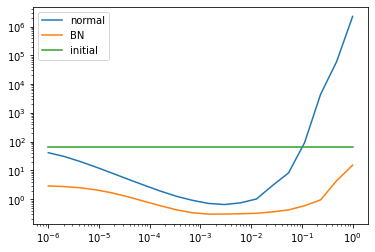

In [10]:
fig, ax = plt.subplots(1, 1)
ax.plot(lrs, losses, label='normal')
ax.plot(lrs, losses_bn, label='BN')
ax.plot(lrs, [initial_loss]*len(lrs), label='initial')
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend()

In [11]:
print((delta_bn - delta) / delta * 100)

54.622768899022034
